In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [63]:
df = pd.read_excel('weight_height.xlsx')

In [64]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


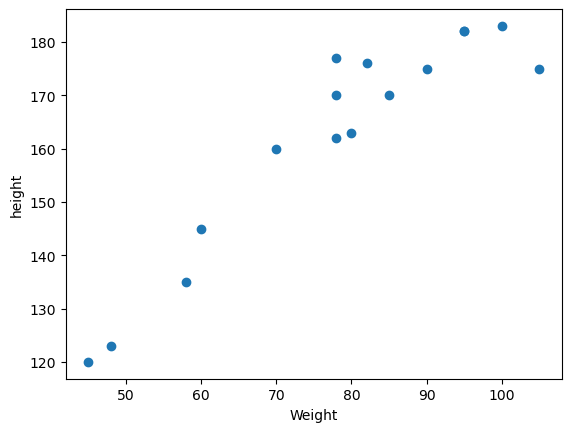

In [65]:
## scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('height')
plt.show()

In [66]:
## corealtion
df.corr()

,Weight,Height
Weight,1.000000,0.934236
Height,0.934236,1.000000


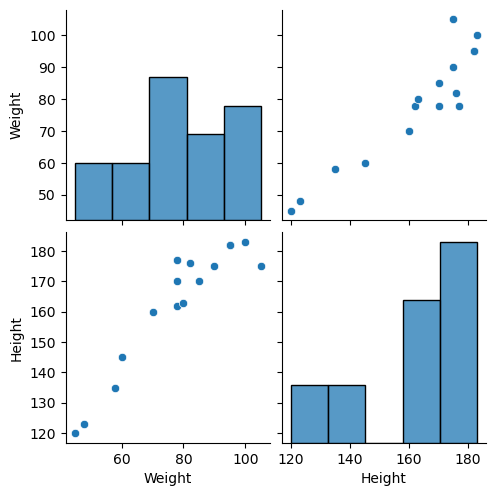

In [67]:
## searborn for visualization
import seaborn as sns
sns.pairplot(df)
plt.show()


In [68]:
## independent and dependent features
X = df[['Weight']]  ## independent features should be dataframe or 2-d array
y = df['Height']  ## this var can be  in series and 1-d array 

In [69]:
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [70]:
y.head()

0    120
1    135
2    123
3    145
4    160
Name: Height, dtype: int64

In [71]:
## Train test spilt
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [72]:
## standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)     # ✅ fit on training
X_test = scaler.transform(X_test)           # ✅ transform only on test


In [73]:
## apply simple linear regresssion
from sklearn.linear_model import LinearRegression


In [74]:
regression = LinearRegression(n_jobs=-1)
regression.fit(X_train, Y_train)


LinearRegression(n_jobs=-1)

In [75]:
print("coefficient of slopes : ",regression.coef_)
print("intercept of slope : ",regression.intercept_)

coefficient of slopes :  [15.34724528]
intercept of slope :  167.58333333333334


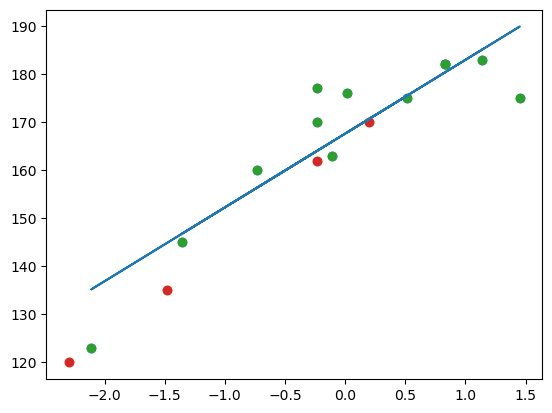

In [93]:
## plot training data plot best fit line
plt.scatter(X_train,Y_train)
plt.scatter(X_test,Y_test)
plt.plot(X_train,regression.predict(X_train))
plt.show()


## Predection of test data
Predicted height output=intercept+coef_(weights)

y_pred_test=89.197+0.95(x_test)

In [77]:
## prediciton for test data
y_pred = regression.predict(X_test)

In [78]:
## performance matrices
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [79]:
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

63.27506336142847
6.210844108319108
7.954562424258701


In [80]:

from sklearn.metrics import r2_score
score=r2_score(Y_test,y_pred)
print(score) 

0.8444135525153134


In [ ]:
##import ols linear regression
import statsmodels.api as sm

In [82]:
model = sm.OLS(Y_train,X_train).fit()

In [83]:
prediction = model.predict(X_test)
print(prediction)

[-35.2378019  -22.77272912  -3.59569407   3.1162682 ]


In [84]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):             -0.082
Method:                 Least Squares   F-statistic:                            0.09207
Date:                Sat, 05 Jul 2025   Prob (F-statistic):                       0.767
Time:                        01:30:56   Log-Likelihood:                         -78.497
No. Observations:                  12   AIC:                                      159.0
Df Residuals:                      11   BIC:                                      159.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\RAHUL JOSHI\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


In [88]:
## prediction for new data
regression.predict(scaler.transform([[55]]))

c:\Users\RAHUL JOSHI\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([141.93404896])

ValueError: x and y must be the same size